<a href="https://colab.research.google.com/github/Plogeur/HAI923/blob/main/Notebook_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Notebook Preprocessing 1 : Visualisation des données </H1>

Dans ce notebook, nous récupérerons les 3 jeux de données et réaliserons la première étape du preprocessing qui est la visualisation de nos jeux de données.

Pour cela nous commencerons par visualiser **une partie des images de chaque jeux de données**, visualiser la **distribution des données par classe** et **par résolution**. Enfin nous réaliserons une **visualisation 2D** (UMAP, tsne et PCA) de nos données afin de déterminer si les données peuvent être liée d'une manière ou d'une autre (couleur pixel/ motif redondant).


Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



## Installation

In [1]:
!pip install umap-learn[plot]
!pip install -U kaleido
!pip install holoviews
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=e5a209253a3376950d4e8604fa30995a5483d4d0694f8522a823845e21361a07
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=19dc57cae242dda55655d4e0c34197c98629a8dd951525969e7c2b20b95e1a65
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for data

In [2]:
import PIL
import sys
import os
import shutil
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import cv2
import string
import zipfile
import random
import umap
import umap.plot
import kaleido
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from skimage import io, color, img_as_ubyte
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio

##Définition des constantes globale      


In [3]:
# constantes globales
IMG_SIZE = 128 # Taille de l'image
CHANEL = 3
COLUMNS = 25 # Nombre d'images à afficher
VERBOSE = 1 # Barre de chargement (0 : off, 1 : on, 2 : on mais moche)

##Drive et Création dossier

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/My Drive/Colab Notebooks/
%mkdir -p HAI923/Résultats
%cd HAI923/
%pwd

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks/HAI923


'/content/gdrive/My Drive/Colab Notebooks/HAI923'

##Récupération des jeux de données


In [5]:
if not(os.path.exists('Tiger-Fox-Elephant/')) :
  if not(os.path.exists('Tiger-Fox-Elephant.zip')) :
    !wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
  with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref :
    zip_ref.extractall()
%cd Tiger-Fox-Elephant/

/content/gdrive/My Drive/Colab Notebooks/HAI923/Tiger-Fox-Elephant


## Visualisation des images


Il y a trois jeux de données différents : des tigres, des éléphants et des renards. Pour chacun d'entre eux il y a un ensemble d'images positive et un ensemble d'images négatives. Par exemple dans le répertoire *tiger* il n'y a que des images de tigre et dans le répertoire *Tiger_negative_class* il n'y a que des images d'animaux qui ne correspondent pas à des tigres.   

Le code ci-dessous permet de visualiser quelques images contenues dans le répertoire *tiger*.

In [6]:
mypath='tiger/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread(join(mypath,onlyfiles[n]))

COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

plt.savefig("../Résultats/tiger_images.png")
plt.show()
plt.close()

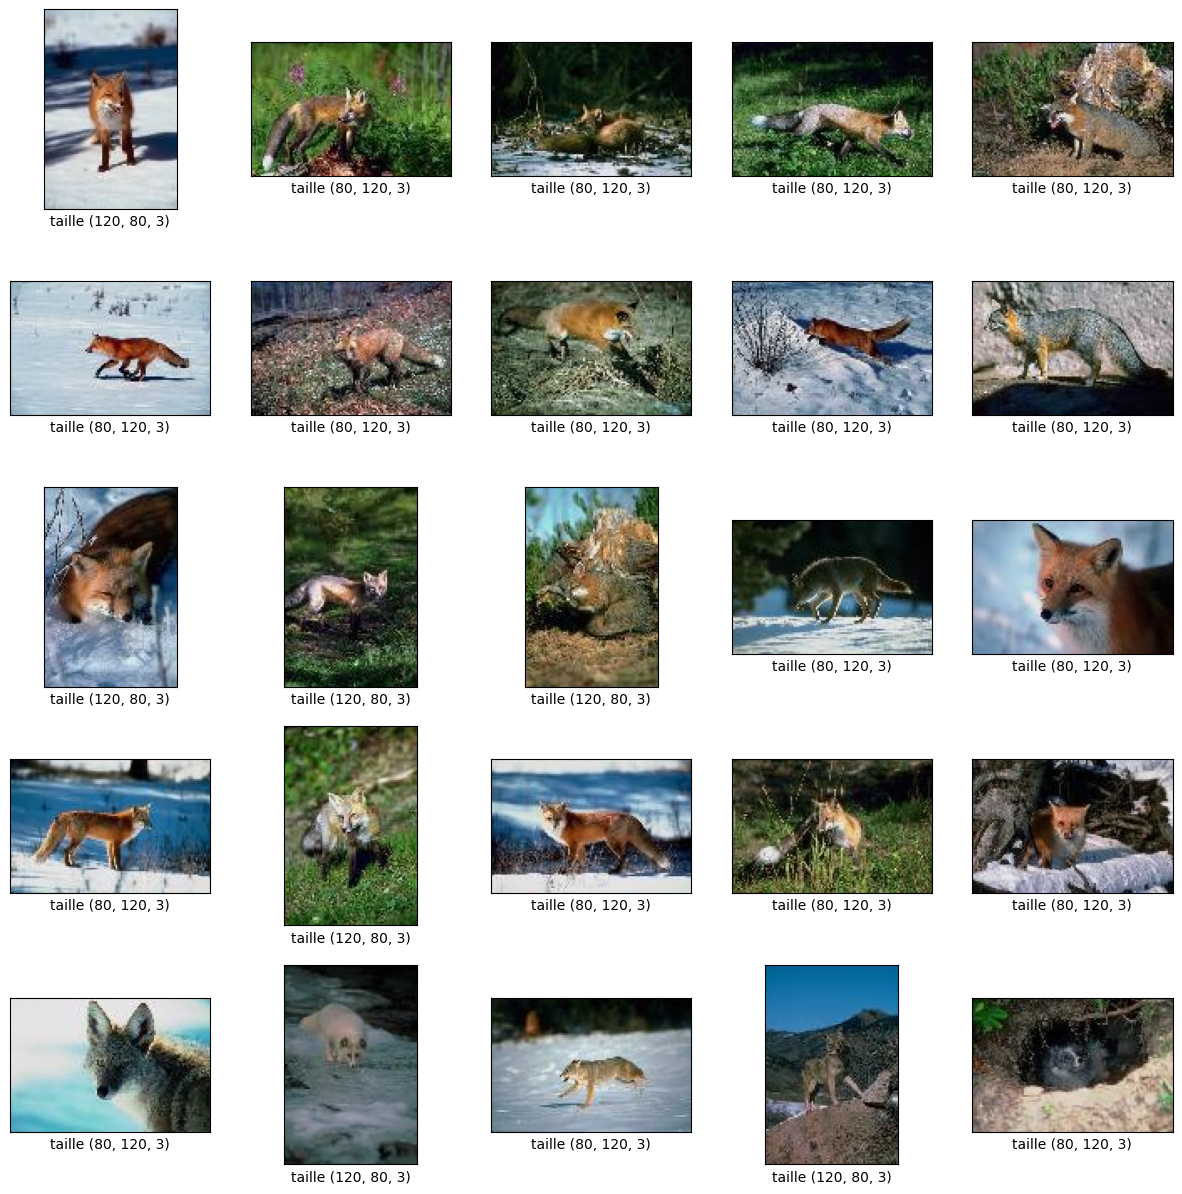

In [7]:
mypath='fox/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread(join(mypath,onlyfiles[n]))

COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

plt.savefig("../Résultats/fox_images.png")
plt.show()
plt.close()

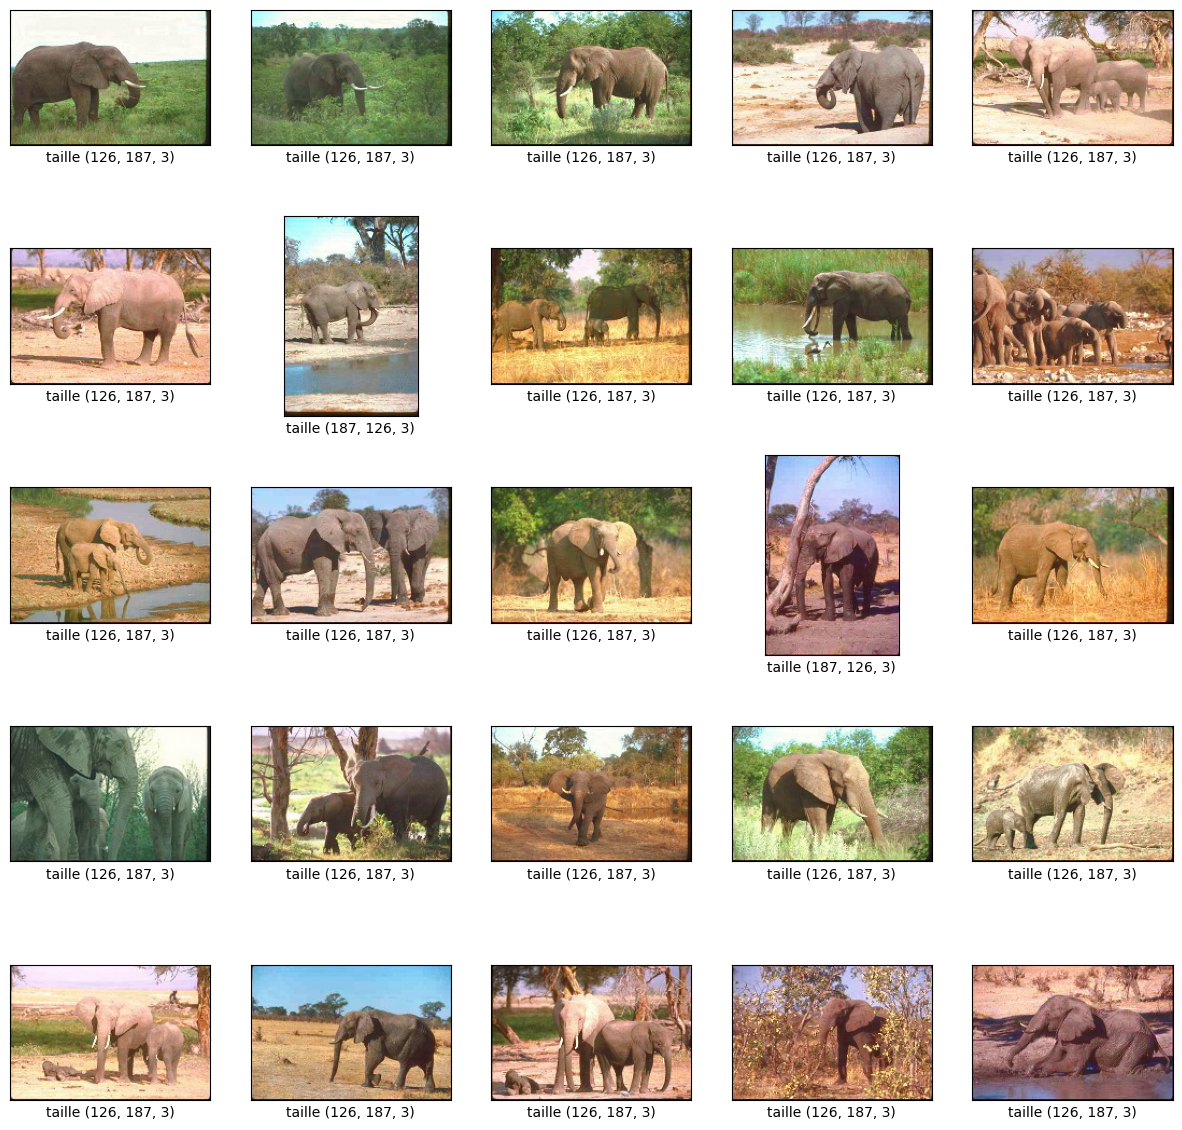

In [8]:
mypath='elephant/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread(join(mypath,onlyfiles[n]))

COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

plt.savefig("../Résultats/elephant_images.png")
plt.show()
plt.close()

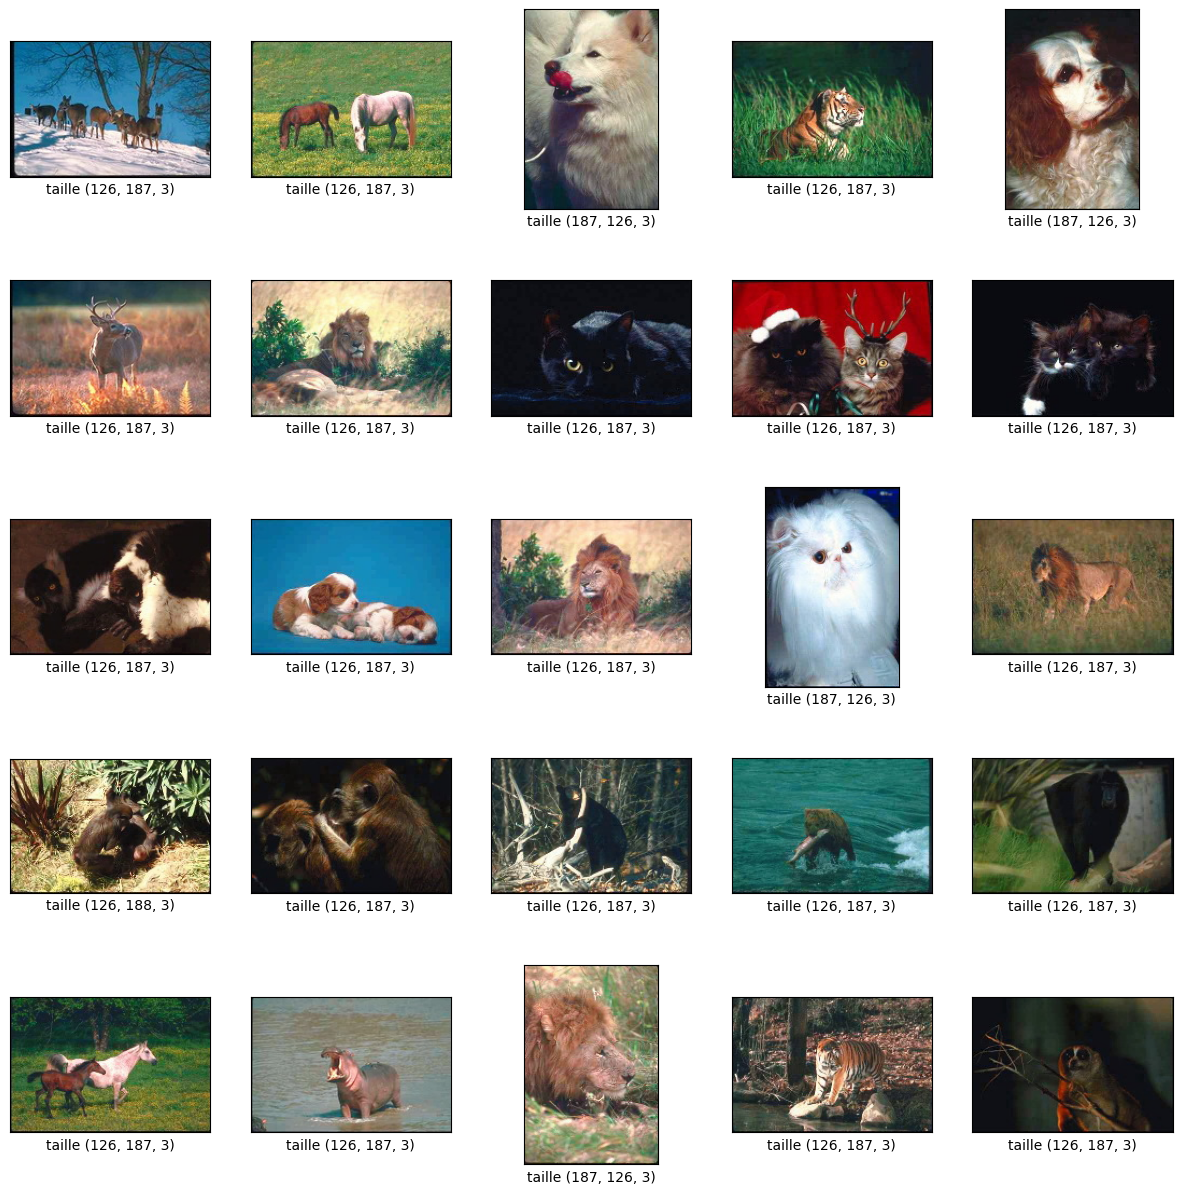

In [9]:
mypath='Elephant_negative_class/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread(join(mypath, onlyfiles[n]))

COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

plt.savefig("../Résultats/autre_images.png")
plt.show()
plt.close()

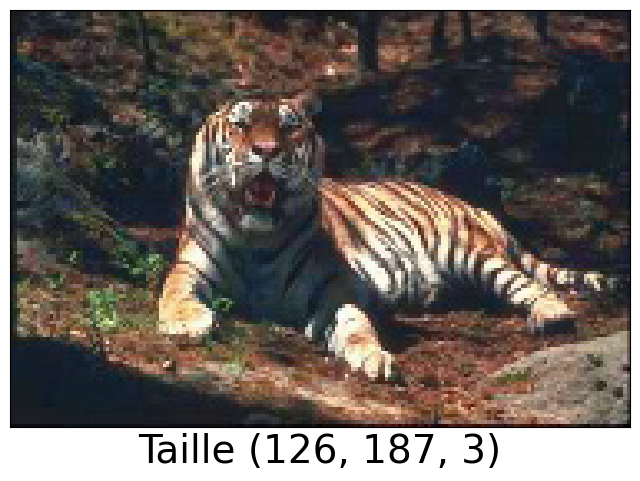

In [10]:
mypath = 'tiger/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

if len(onlyfiles) > 0:
    first_image = cv2.imread(join(mypath, onlyfiles[0]))
    first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(first_image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Taille ' + str(first_image.shape), fontsize=28)  # Increase the fontsize here
    plt.savefig("../Résultats/img_exemple_résolution.png")
    plt.show()
else:
    print("No images found in the specified directory.")

In [11]:
def plot_examples(resized_image, IMG_S):
  plt.imshow(resized_image[0])  # Assuming that resized_image is a batch of images, so we select the first one.
  plt.axis('off')  # Turn off axis labels
  plt.savefig(f"../Résultats/img_exemple_resize_{IMG_S}.png")
  plt.show()

In [12]:
def resize_img(IMG_S) :
  path = 'tiger'
  for img in os.listdir(path) :
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
    X = cv2.resize(img_array, (IMG_S, IMG_S))
    X = np.array(X).reshape(-1,IMG_S, IMG_S, 3)
    X = X.astype('float')
    X = X/255.0
    return X

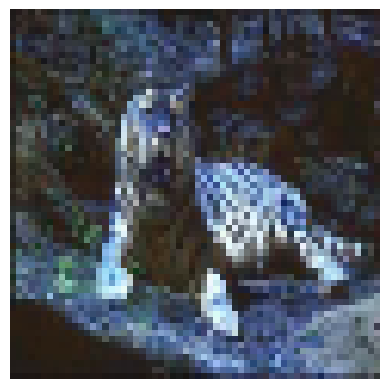

In [13]:
X_60 = resize_img(60)
plot_examples(X_60, 60)

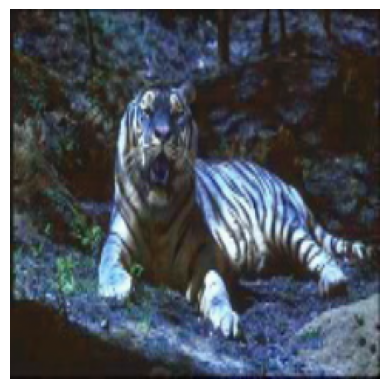

In [14]:
X_240 = resize_img(240)
plot_examples(X_240, 240)

In [15]:
mypath='tiger/'

# Get a list of all files in the directory
files = os.listdir(mypath)

# Filter the list to only include image files based on file content
image_files = []
for file in files:
    try:
        with Image.open(os.path.join(mypath, file)) as img:
            image_files.append(file)
    except Exception as e:
        pass  # Not an image file

# If you want to collect the unique formats detected, you can do this:
unique_formats = set()
for image_file in image_files:
    with Image.open(os.path.join(mypath, image_file)) as img:
        unique_formats.add(img.format)

print(f"Unique image formats found: {', '.join(unique_formats)}")

Unique image formats found: JPEG


Nous pouvons constater que les images ne sont pas de la même taille. Il faudra donc les convertir en une taille fixe.


## Visualisation de la distribution des images dans les classes

In [16]:
# Classes à comparer
classes = ["tiger", "Tiger_negative_class", "elephant", "Elephant_negative_class", "fox", "Fox_negative_class"]

# Dictionnaire pour stocker le nombre d'images par classe
image_counts = {class_name: 0 for class_name in classes}

# Compter le nombre d'images dans chaque classe
for class_name in classes:
    class_path = class_name
    image_count = len([file for file in os.listdir(class_path) if file.endswith(".jpg") or file.endswith(".png")])
    image_counts[class_name] = image_count

# Couleurs pour chaque groupe de deux classes
colors = ['red', 'red', 'gray', 'gray', 'orange', 'orange']

# Créer le graphique
plt.figure(figsize=(12, 5))
bars = plt.bar(image_counts.keys(), image_counts.values(), color=colors)
plt.title('Distribution des images par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'Images')

plt.grid(False)
plt.savefig("../Résultats/Distribution_des_images_par_classe.png")
plt.show()

## Visualisation de la résolution des images

In [17]:
mypath='tiger/'
image_resolutions = []

# Walk through all subdirectories of the folder
for root, dirs, files in os.walk(mypath):
    # Loop through all files in the directory
    for file in files:
        if file == ".DS_Store" :
          continue
        img = Image.open(os.path.join(root, file))
        image_resolutions.append(img.size)
        img.close()

# Create a list of the x values for the histogram bins
x_values = list(range(120, 210, 5)) # because fox has a lower resolution picture compare to other one

# Create the histogram
plt.hist([r[0] for r in image_resolutions], bins=x_values, alpha=0.5, label='Width')
plt.hist([r[1] for r in image_resolutions], bins=x_values, alpha=0.5, label='Height')

# Add labels and title
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.title('Resolution de la distribution des images')

# Add legend
plt.legend(loc='upper right')

# Show the graph
plt.savefig("../Résultats/Tiger_Resolution_distribution_images.png")
plt.show()

In [18]:
mypath='elephant/'
image_resolutions = []

# Walk through all subdirectories of the folder
for root, dirs, files in os.walk(mypath):
    # Loop through all files in the directory
    for file in files:
        if file == ".DS_Store" :
          continue
        img = Image.open(os.path.join(root, file))
        image_resolutions.append(img.size)
        img.close()

# Create a list of the x values for the histogram bins
x_values = list(range(120, 210, 5)) # because fox has a lower resolution picture compare to other one

# Create the histogram
plt.hist([r[0] for r in image_resolutions], bins=x_values, alpha=0.5, label='Width')
plt.hist([r[1] for r in image_resolutions], bins=x_values, alpha=0.5, label='Height')

# Add labels and title
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.title('Resolution de la distribution des images')

# Add legend
plt.legend(loc='upper right')

# Show the graph
plt.savefig("../Résultats/Elephant_Resolution_distribution_images.png")
plt.show()

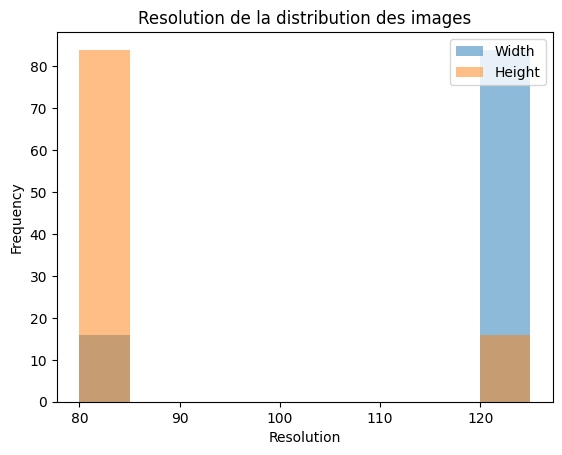

In [19]:
mypath='fox/'
image_resolutions = []

# Walk through all subdirectories of the folder
for root, dirs, files in os.walk(mypath):
    # Loop through all files in the directory
    for file in files:
        if file == ".DS_Store" :
          continue
        img = Image.open(os.path.join(root, file))
        image_resolutions.append(img.size)
        img.close()

# Create a list of the x values for the histogram bins
x_values = list(range(80, 128, 5)) # because fox has a lower resolution picture compare to other one

# Create the histogram
plt.hist([r[0] for r in image_resolutions], bins=x_values, alpha=0.5, label='Width')
plt.hist([r[1] for r in image_resolutions], bins=x_values, alpha=0.5, label='Height')

# Add labels and title
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.title('Resolution de la distribution des images')

# Add legend
plt.legend(loc='upper right')

# Show the graph
plt.savefig("../Résultats/fox_Resolution_distribution_images.png")
plt.show()

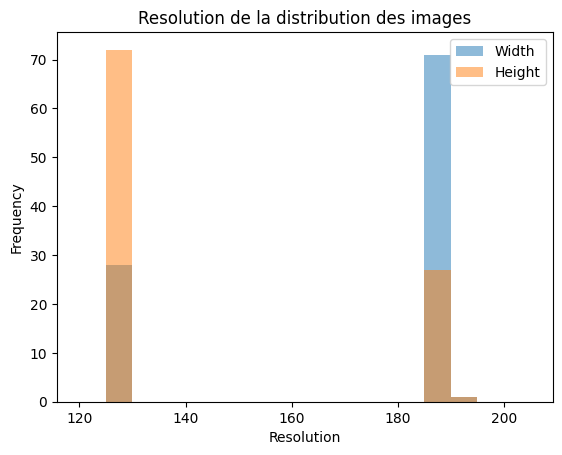

In [20]:
mypath='Tiger_negative_class/'
image_resolutions = []

# Walk through all subdirectories of the folder
for root, dirs, files in os.walk(mypath):
  # Loop through all files in the directory
  for file in files:
    if file == ".DS_Store" :
      continue
    img = Image.open(os.path.join(root, file))
    image_resolutions.append(img.size)
    img.close()

# Create a list of the x values for the histogram bins
x_values = list(range(120, 210, 5)) # because fox has a lower resolution picture compare to other one

# Create the histogram
plt.hist([r[0] for r in image_resolutions], bins=x_values, alpha=0.5, label='Width')
plt.hist([r[1] for r in image_resolutions], bins=x_values, alpha=0.5, label='Height')

# Add labels and title
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.title('Resolution de la distribution des images')

# Add legend
plt.legend(loc='upper right')

# Show the graph
plt.savefig("../Résultats/Tiger_negative_class_Resolution_distribution_images.png")
plt.show()

## Visualisation des données par clustering

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

*Attention : Pensez toute fois à tester plusieur combinaison de paramètre pour vérifier que les données ne sont pas liée. By changing the n_neighbors and min_dist parameters, you can explore their impact on the resulting projection.
Pour cette exemple les paramètres sont tester aléatoirement pour commencé, vous pouvez voir que l'on ne retouve pas de cluster identifiable néanmoins en les modifiant on retrouve notre mammouth (en quelque sorte) :*

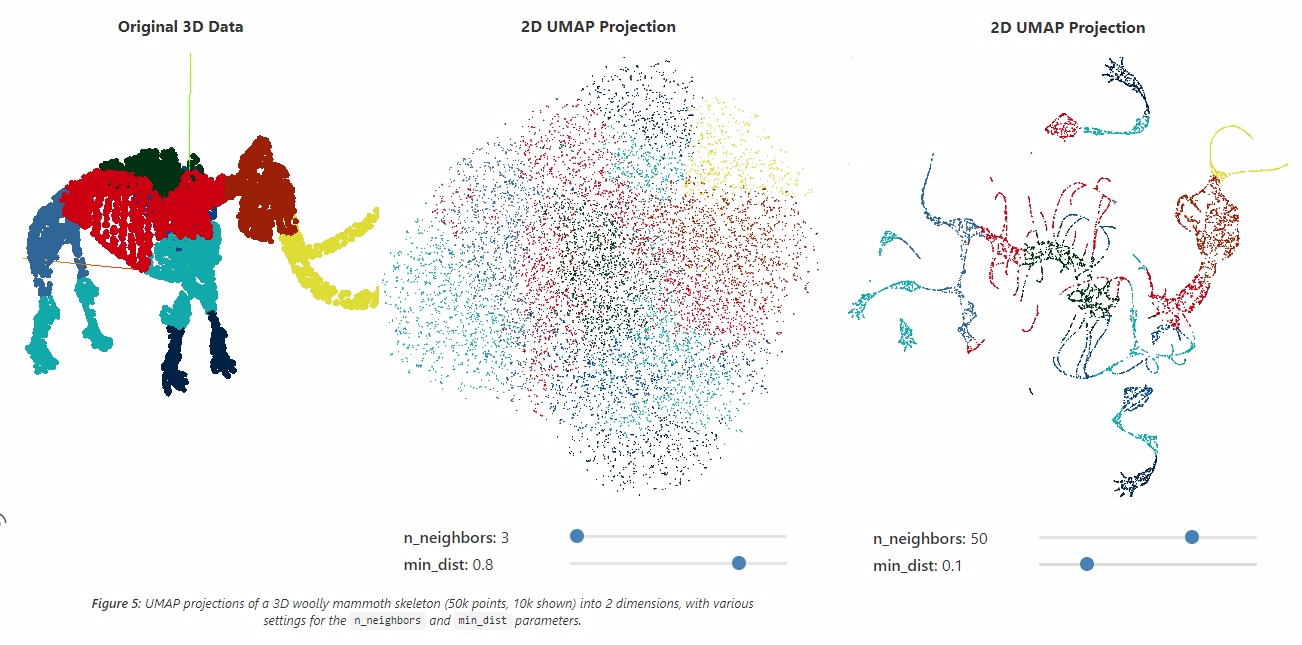

In [21]:
%mkdir Résultats/PCA
%mkdir Résultats/UMAP
%mkdir Résultats/TSNE

mkdir: cannot create directory ‘Résultats/PCA’: No such file or directory
mkdir: cannot create directory ‘Résultats/UMAP’: No such file or directory
mkdir: cannot create directory ‘Résultats/TSNE’: No such file or directory


In [22]:
def create(my_classes) :
  X,y=create_X_y(my_classes)
  X=X.astype('float')
  X=X/255.0
  return X,y

def create_training_data(list_classes):
  training_data=[]
  for classes in list_classes:
      path=classes
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try :
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y(list_classes):
      # récupération des données
      training_data=create_training_data(list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

### **Elephant**

In [23]:
my_classes=['elephant','Elephant_negative_class']
X, y = create(my_classes)

In [24]:
label_dictionnary = {
          0:'elephant',
          1:'Elephant_negative_class'}

def true_label(X):
    return label_dictionnary[X]

X_reshape = X.reshape((-1, IMG_SIZE*IMG_SIZE*CHANEL))
y_plot = y
nb_images = X.shape[0]

Target_names=[]
for i in range(0, nb_images):
  Target_names=np.append(Target_names,true_label(y[i]))

**TSNE**

In [25]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_reshape)

traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False, )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/TSNE/elephant.png", engine="kaleido")

**PCA**

In [26]:
# Utilisation de PCA
pca = PCA(n_components=2)
pca.fit(X_reshape)
X_pca = pca.transform(X_reshape)

trace0 = go.Scatter(
    x = X_pca[:,0],
    y = X_pca[:,1],
    mode = 'markers',
    text = Target_names,
    showlegend = False,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/PCA/elephant.png")

**UMAP**

In [27]:
import bokeh.plotting as bpl

def umap_function(index, parameter) :

  mapper = umap.UMAP().fit(X_reshape) # n_neighbors=15, min_dist=1.0

  # utilisation d'un dataframe pour afficher les points
  hover_data = pd.DataFrame({'index':np.arange(nb_images),
                            'label': y_plot})
  hover_data['item'] = hover_data.label.map(label_dictionnary)

  # affichage de la visualisation dans le notebook
  umap.plot.output_notebook()

  # Utilisation de umap en interactif
  standard_embedding = umap.UMAP(random_state=123).fit_transform(X_reshape)

  # Plot Umap
  plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y, s=50, cmap='Spectral');

  plt.savefig(f"../Résultats/UMAP/elephant_{index}.png")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



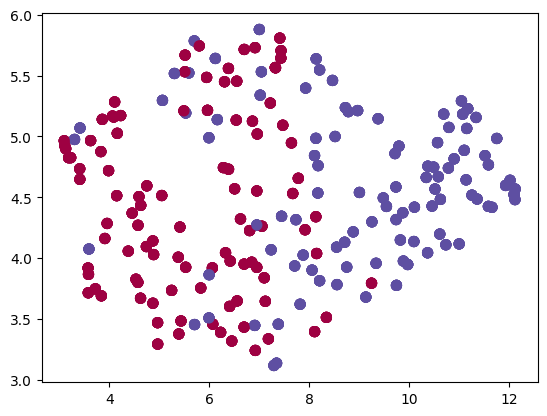

In [28]:
ListParameter = [(15,1.0),(25,0.8),(50,0.4),(10,0.2),(30,1.4),(50,2.0)]
for index, parameter in enumerate(ListParameter) :
  umap_function(index, parameter)

### **Tiger**

In [29]:
my_classes=['tiger','Tiger_negative_class']
X, y = create(my_classes)

In [30]:
label_dictionnary = {
          0:'tiger',
          1:'Tiger_negative_class'}

def true_label(X):
    return label_dictionnary[X]

X_reshape = X.reshape((-1, IMG_SIZE*IMG_SIZE*CHANEL))
y_plot = y
nb_images = X.shape[0]

Target_names=[]
for i in range(0, nb_images):
  Target_names=np.append(Target_names,true_label(y[i]))

**TSNE**

In [31]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_reshape)

traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False, )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/TSNE/tiger.png")

**PCA**

In [32]:
# Utilisation de PCA
pca = PCA(n_components=2)
pca.fit(X_reshape)
X_pca = pca.transform(X_reshape)

trace0 = go.Scatter(
    x = X_pca[:,0],
    y = X_pca[:,1],
    mode = 'markers',
    text = Target_names,
    showlegend = False,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/PCA/tiger.png")

**UMAP**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



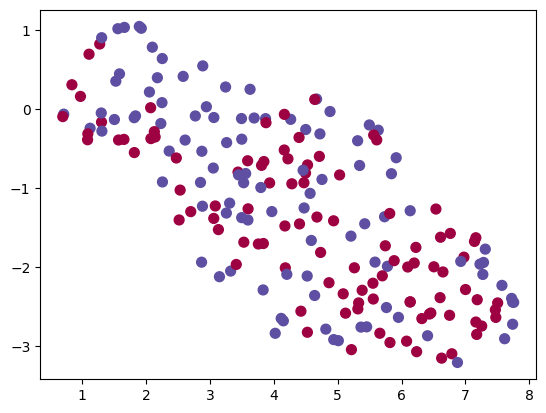

In [33]:
import bokeh.plotting as bpl

mapper = umap.UMAP().fit(X_reshape) # n_neighbors=15, min_dist=1.0

# utilisation d'un dataframe pour afficher les points
hover_data = pd.DataFrame({'index':np.arange(nb_images),
                          'label': y_plot})
hover_data['item'] = hover_data.label.map(label_dictionnary)

# affichage de la visualisation dans le notebook
umap.plot.output_notebook()

# Utilisation de umap en interactif
standard_embedding = umap.UMAP(random_state=123).fit_transform(X_reshape)

# Plot Umap
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y, s=50, cmap='Spectral');

plt.savefig(f"../Résultats/UMAP/tiger.png")

### **Fox**

In [34]:
my_classes=['fox','Fox_negative_class']
X, y = create(my_classes)

In [35]:
label_dictionnary = {
          0:'fox',
          1:'Fox_negative_class'}

def true_label(X):
    return label_dictionnary[X]

X_reshape = X.reshape((-1, IMG_SIZE*IMG_SIZE*CHANEL))
y_plot = y
nb_images = X.shape[0]

Target_names=[]
for i in range(0, nb_images):
  Target_names=np.append(Target_names,true_label(y[i]))

**TSNE**

In [36]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_reshape)

traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    text = Target_names,
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False, )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/TSNE/fox.png")

**PCA**

In [37]:
# Utilisation de PCA
pca = PCA(n_components=2)
pca.fit(X_reshape)
X_pca = pca.transform(X_reshape)

trace0 = go.Scatter(
    x = X_pca[:,0],
    y = X_pca[:,1],
    mode = 'markers',
    text = Target_names,
    showlegend = False,
    marker = dict(
        size = 15,
        color = y_plot,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
pio.write_image(fig, f"../Résultats/PCA/fox.png")

**UMAP**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



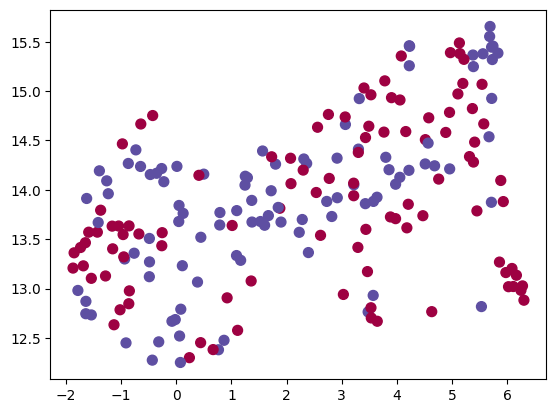

In [38]:
import bokeh.plotting as bpl

mapper = umap.UMAP().fit(X_reshape) # n_neighbors=15, min_dist=1.0

# utilisation d'un dataframe pour afficher les points
hover_data = pd.DataFrame({'index':np.arange(nb_images),
                          'label': y_plot})
hover_data['item'] = hover_data.label.map(label_dictionnary)

# affichage de la visualisation dans le notebook
umap.plot.output_notebook()

# Utilisation de umap en interactif
standard_embedding = umap.UMAP(random_state=123).fit_transform(X_reshape)

# Plot Umap
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y, s=50, cmap='Spectral');

plt.savefig(f"../Résultats/UMAP/fox.png")